In [8]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [21]:
base = Path.cwd().parent / "data" / "standard"


dfs = {}
for p in base.glob("*.parquet"):
    temp = pd.read_parquet(p)
    name = temp['area'].iloc[0]
    dfs[name] = temp
    print(name)

10YES-REE------0
10YFR-RTE------C
10YPT-REN------W


In [22]:
dfs.keys()

dict_keys(['10YES-REE------0', '10YFR-RTE------C', '10YPT-REN------W'])

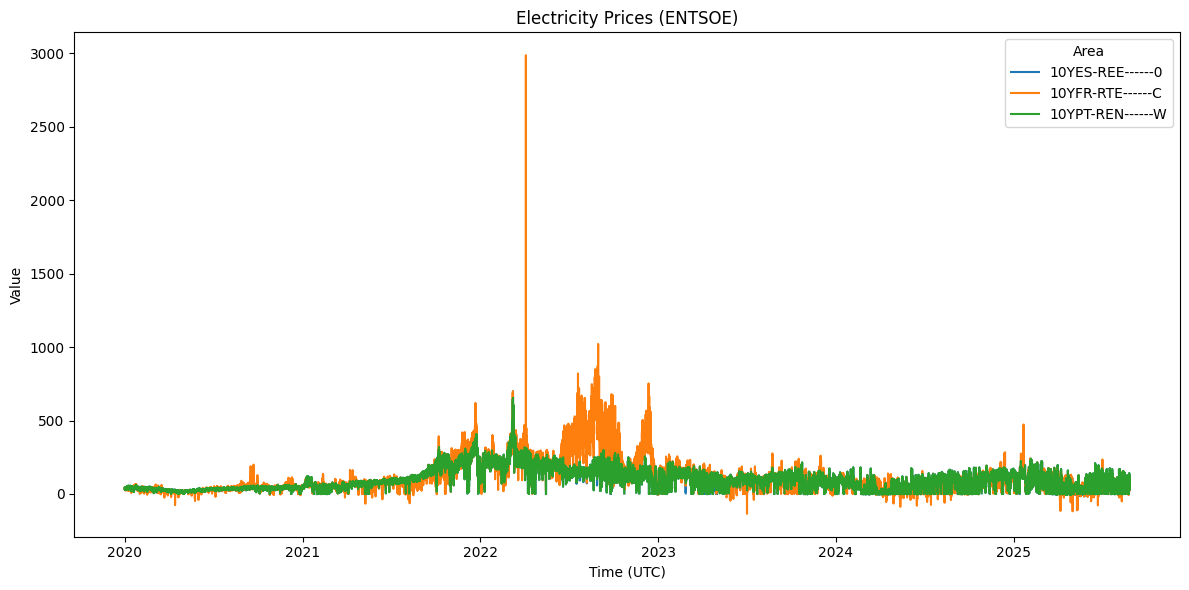

In [23]:
df = pd.concat(dfs, ignore_index=True)

# asegurar tipo de fecha
df["timestamp_utc"] = pd.to_datetime(df["timestamp_utc"])

# pivotear: columnas = áreas
pivot = df.pivot(index="timestamp_utc", columns="area", values="value")

# graficar
plt.figure(figsize=(12, 6))
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], label=col)

plt.title("Electricity Prices (ENTSOE)")
plt.xlabel("Time (UTC)")
plt.ylabel("Value")
plt.legend(title="Area")
plt.tight_layout()
plt.show()